<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/Linear_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Correlation Coefficient**

The correlation coefficient measures the extent to which the relationship between two variables is linear. Its value is always between -1 and 1. A positive coefficient indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

The correlation coefficient of two series $X$ and $Y$ is defined as
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
where $Cov$ is the covariance and $std$ is the standard deviation.

Two random sets of data will have a correlation coefficient close to 0:

## **Correlation vs. Covariance**

Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

## **Covariance isn't that meaningful by itself**

Let's say we have two variables $X$ and $Y$ and we take the covariance of the two.

In [0]:
!pip install quandl

In [0]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

print(np.cov(X, Y)[0, 1])

0.19453788840888922


So now what? What does this mean? Correlation uses information about the variance of X and Y to normalize this metric. Once we've normalized the metric to the -1 to 1 scale, we can make meaningful statements and compare correlations.

To see how this is done consider the formula.

$$\frac{Cov(X, Y)}{std(X)std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$

To demonstrate this let's compare the correlation and covariance of two series.

In [0]:
X = np.random.rand(50)
Y = 2 * X + 4

print(f'Covariance of X and Y: {np.cov(X, Y)}')
print(f'Correlation of X and Y: {np.corrcoef(X, Y)}')

Covariance of X and Y: [[0.07810667 0.15621334]
 [0.15621334 0.31242669]]
Correlation of X and Y: [[1. 1.]
 [1. 1.]]


## **Why do both `np.cov` and `np.corrcoef` return matrices?**

The covariance matrix is an important concept in statistics. Often people will refer to the covariance of two variables $X$ and $Y$, but in reality that is just one entry in the covariance matrix of $X$ and $Y$. For each input variable we have one row and one column. The diagonal is just the variance of that variable, or $Cov(X, X)$, entries off the diagonal are covariances between different variables. The matrix is symmetric across the diagonal. Let's check that this is true.

In [0]:
cov_matrix = np.cov(X, Y)

# We need to manually set the degrees of freedom on X to 1, as numpy defaults to 0 for variance
# This is usually fine, but will result in a slight mismatch as np.cov defaults to 1

error = cov_matrix[0, 0] - X.var(ddof=1)

print(f'error: {error}')

error: 1.3877787807814457e-17


Correlation: -0.22135308138442233
Built-in Correlatoion: -0.2169260197567339


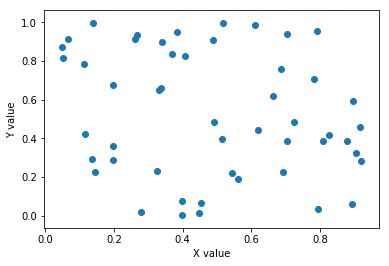

In [0]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X, Y)
plt.xlabel('X value')
plt.ylabel('Y value')

# taking the relevant value from the matrix returned by np.cov
print(f'Correlation: {np.cov(X, Y)[0,1]/(np.std(X)*np.std(Y))}')

# Let's also use the builtin correlation function
print(f'Built-in Correlatoion: {np.corrcoef(X, Y)[0, 1]}')

Now let's see what two correlated sets of data look like.

Built-in Correlatoion: 0.9497539917610216


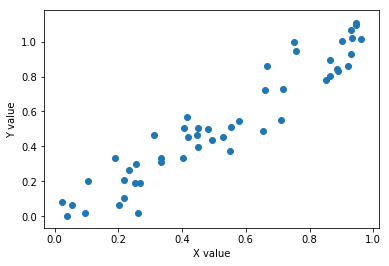

In [0]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X, Y)
plt.xlabel('X value')
plt.ylabel('Y value')

print(f'Built-in Correlatoion: {np.corrcoef(X, Y)[0, 1]}')

Let's dial down the relationship by introducing more noise.

Built-in Correlatoion: 0.8090784718028985


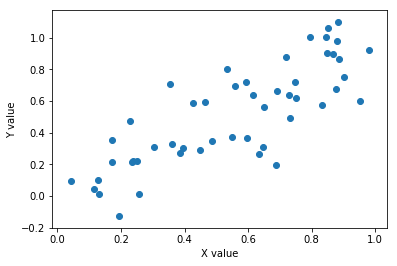

In [0]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.2, 50)

plt.scatter(X, Y)
plt.xlabel('X value')
plt.ylabel('Y value')

print(f'Built-in Correlatoion: {np.corrcoef(X, Y)[0, 1]}')

Finally, let's see what an inverse relationship looks like.

Built-in Correlatoion: -0.9513200800848102


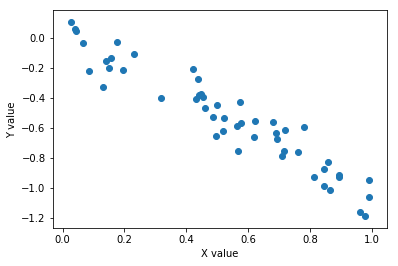

In [0]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50)

plt.scatter(X, Y)
plt.xlabel('X value')
plt.ylabel('Y value')

print(f'Built-in Correlatoion: {np.corrcoef(X, Y)[0, 1]}')

## **How is this useful in finance?**

### **Determining related assets**

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series. For example, let's look at the price of Apple and a semiconductor equipment manufacturer, Lam Research Corporation.

LRCX and AAPL: 0.9594867068081923


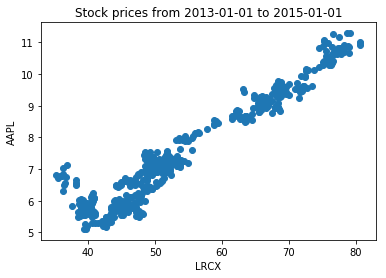

In [0]:
# Pull the pricing data for our two stocks and S&P 500
start = '2013-01-01'
end = '2015-01-01'

quandl.ApiConfig.api_key = 'xx8w-rWbjyXpygy-PN5m'   #create an account with Quandl and insert your api key here, otherwise you are limited to only 50 data calls per day

a1 = quandl.get('WIKI/LRCX.11', start_date=start, end_date=end)
a2 = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)


a1 = a1['Adj. Close'].values
a2 = a2['Adj. Close'].values/10

plt.scatter(a1, a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)

print (f'LRCX and AAPL: {np.corrcoef(a1, a2)[0,1]}')


## **Constructing a portfolio of uncorrelated assets**

Another reason that correlation is useful in finance is that uncorrelated assets produce the best portfolios. The intuition for this is that if the assets are uncorrelated, a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined.

## **Limitations**

### **Significance**

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use, but is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, AAPL and LRCX are slightly more correlated with each other than with the average stock.

One fundamental problem is that it is easy to datamine correlations by picking the right time period. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient. More details on why single point estimates are bad will be covered in future notebooks.

As an example, remember that the correlation of AAPL and LRCX from 2013-1-1 to 2015-1-1 was 0.78. Let's take the rolling 60 day correlation between the two to see how that varies.

Text(0, 0.5, '60-day Rolling Correlation')

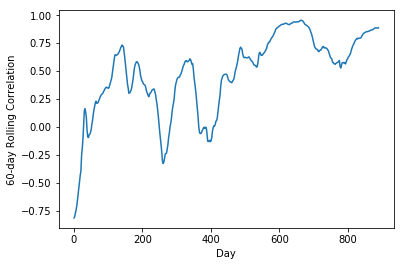

In [0]:
matrix = np.array([a1, a2])

matrix = pd.DataFrame(matrix)
matrix = matrix.T

matrix.columns = ['LRCX', 'AAPL']

matrix = matrix.rolling(60).corr()

matrix.dropna(inplace = True)
matrix.reset_index(inplace = True)
matrix = matrix.loc[(matrix['LRCX'] < 1.0) & (matrix['level_1'] == 'AAPL')]

rolling_correlation = matrix[['LRCX']]

plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')


## **Non-Linear Relationships**

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up. For instance, one variable might precisely follow the behavior of a second, but with a delay. There are techniques for dealing with this lagged correlation. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

As an example, let's make the noise distribution poisson rather than normal and see what happens.

0.31154351760818394

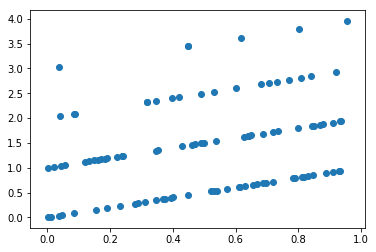

In [0]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

In conclusion, correlation is a powerful technique, but as always in statistics, one should be careful not to interpret results where there are none.